In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
from datetime import date
from decimal import Decimal

VIX_RAW = pd.read_excel('Fraily Time Series.xlsx',sheet_name='VIX RAW')
# VIX_Slope = pd.read_excel('Fraily Time Series.xlsx',sheet_name='VIX Slope')
# TED_RAW = pd.read_excel('Fraily Time Series.xlsx',sheet_name='TED RAW')
# TED_Slope = pd.read_excel('Fraily Time Series.xlsx',sheet_name='TED Slope')
# TED_Discretized_N_2 = pd.read_excel('Fraily Time Series.xlsx',sheet_name='TED Discretized Frailty Time Se')
# TED_Discretized_N_4 = pd.read_excel('Fraily Time Series.xlsx',sheet_name='Sheet11')
# TED_Discretized_N_6 = pd.read_excel('Fraily Time Series.xlsx',sheet_name='Sheet12')
# VIX_Discretized_N_2 = pd.read_excel('Fraily Time Series.xlsx',sheet_name='VIX Discretized Frailty Time Se')
# VIX_Discretized_N_4 = pd.read_excel('Fraily Time Series.xlsx',sheet_name='Sheet13')
# VIX_Discretized_N_6 = pd.read_excel('Fraily Time Series.xlsx',sheet_name='Sheet14')

In [131]:

def Generate_Slope_TS( dates,value ):
# %
# %  Creates a slope timeseries object from a "raw data" time series
# %
#     output_date = date
#     output_value = value
    
    num_tradedays = len(value)
    temp_slope_array = []
    temp_date_array = []
    for j in range(1,num_tradedays):
        if j == 1:
            temp_slope = 0
        else: 
            # use Decimal otherwise everything is zero
            temp_slope = (Decimal(value[j])-Decimal(value[j-1]))/(date.toordinal(datetime.strptime(dates[j], '%Y-%m-%d %H:%M:%S').date()) - 
            date.toordinal(datetime.strptime(dates[j-1], '%Y-%m-%d %H:%M:%S').date()))
            temp_slope = temp_slope/100
        temp_date_array.append(dates[j])
        temp_slope_array.append(temp_slope)

    output_TS = pd.DataFrame({"Time":temp_date_array,"Slope":temp_slope_array})
#     temp_symbol_ts = timeseries(temp_slope_array, temp_date_array)
#     temp_symbol_ts.TimeInfo.Units = 'days'
#     output_TS = temp_symbol_ts
#     output_TS.Name = str(input_TS.Name) + 'Slope Time Series'
#     output_TS.TimeInfo.StartDate = 0
    
    return output_TS
#      %   output_TS.Format = 'mmm dd, yy';





In [128]:
class Frail_TS:
    
    def __init__(self,DF):
        self.Raw_data = DF

        excel_date = DF.iloc[:,0]
        value = DF.iloc[:,1]
        if len(excel_date) != len(value):
            print('Error - value and date arrays must be of the same length')
        else:
            num_dates = len(excel_date)
            matlab_date = []
            for i in excel_date:
                sums = date.toordinal(datetime.strptime(i, '%Y-%m-%d %H:%M:%S').date()) + date.toordinal(date(1899,12,30))
                matlab_date.append(sums)
#             value = value/100

            self.Slope  = Generate_Slope_TS( excel_date, value )
        
    def Raw_data(self):
        return self.Raw_data
    
    def Slope(self):
        return self.Slope
# if __name__ == "main":
#     construct_Frail_TS(value,matlabe_date)

In [4]:

def convert_date(DF):
    for i in range(len(DF['Time'])):
        DF['Time'][i] = datetime.strptime(str(DF['Time'][i]), '%d-%m-%Y %H:%M:%S').strftime('%Y-%m-%d %H:%M:%S')

    

In [6]:
convert_date(VIX_RAW)

<ipython-input-4-a7d0a6dfbd15>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF['Time'][i] = datetime.strptime(str(DF['Time'][i]), '%d-%m-%Y %H:%M:%S').strftime('%Y-%m-%d %H:%M:%S')


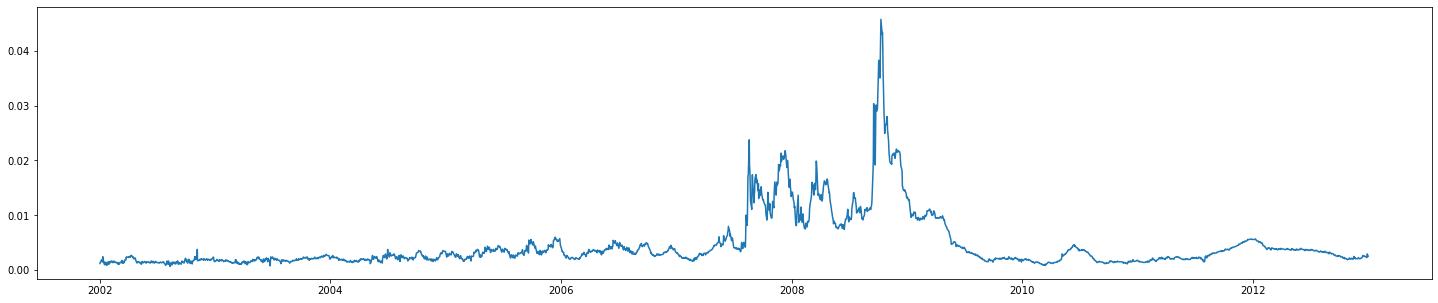

In [8]:
plt.figure(figsize=(25,5))
x = pd.to_datetime(VIX_RAW['Time'])
y = VIX_RAW["VIX RAW Data"]
plt.plot(x,y)

In [132]:
Frail_data = Frail_TS(VIX_RAW)

In [133]:
Frail_data.Slope

,Time,Slope
0,2002-01-03 00:00:00,0
1,2002-01-04 00:00:00,4.370000000000003222144773218E-7
2,2002-01-07 00:00:00,0.000001333333333333333216528619284
3,2002-01-08 00:00:00,-0.000002750000000000000707767178199
4,2002-01-09 00:00:00,1.250000000000014120649094451E-7
...,...,...
2689,2012-12-21 00:00:00,0E-61
2690,2012-12-24 00:00:00,0E-61
2691,2012-12-27 00:00:00,-6.333333333333335489016372813E-7
2692,2012-12-28 00:00:00,0.000006700000000000000226207941267
